In [36]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA

In [47]:

df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

df1['team_id'] = df1['team_id'].str.extract('(\d+)').astype(int)
df1['opp_team_id'] = df1['opp_team_id'].str.extract('(\d+)').astype(int)
df1['playoff'] = df1['playoff'].replace(False,0)

df2['team_id'] = df2['team_id'].str.extract('(\d+)').astype(int)
df2['opp_team_id'] = df2['opp_team_id'].str.extract('(\d+)').astype(int)
df2['playoff'] = df2['playoff'].replace(False,0)

In [48]:
x = df1.drop(labels=['Id','game_seq','team_id','opp_team_id','total_crowd','date','season_end','game_result'],axis = 1)
x_test =df2.drop(labels=['Id','game_seq','team_id','opp_team_id','total_crowd','date','season_end'],axis = 1)
y = df1['game_result']

In [49]:
from sklearn.impute import SimpleImputer
new_x = x
new_test = x_test

cols_with_missing = (col for col in new_x.columns
                         if new_x[col].isnull().any())

for col in cols_with_missing:
    new_x[col + '_was_missing'] = new_x[col].isnull()
    
my_imputer = SimpleImputer()
new_x = pd.DataFrame(my_imputer.fit_transform(new_x))
new_x.columns = x.columns

In [50]:
cols_with_missing = (col for col in new_test.columns
                         if new_test[col].isnull().any())

for col in cols_with_missing:
    new_test[col + '_was_missing'] = new_test[col].isnull()
    
my_imputer = SimpleImputer()
new_test = pd.DataFrame(my_imputer.fit_transform(new_test))
new_test.columns = x_test.columns

In [51]:
new_x.count()

season_game_seq               45000
playoff                       45000
Elo                           45000
opp_Elo                       45000
win_equivalent                45000
bet_ratio                     45000
home_crowd                    45000
opp_crowd                     45000
Elo_was_missing               45000
opp_Elo_was_missing           45000
win_equivalent_was_missing    45000
dtype: int64

In [52]:
new_test.count()

season_game_seq               13107
playoff                       13107
Elo                           13107
opp_Elo                       13107
win_equivalent                13107
bet_ratio                     13107
home_crowd                    13107
opp_crowd                     13107
Elo_was_missing               13107
opp_Elo_was_missing           13107
win_equivalent_was_missing    13107
dtype: int64

In [53]:

print('\nRunning PCA ...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(new_x)

print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])


Running PCA ...
Explained variance: 1.0000
Individual variance contributions:
0.5895074106072026
0.40706043980082035
0.001744685442518208
0.0015746202275358525
0.00010649497102751553
6.257980968027519e-06
3.3283081834703096e-08
2.729218623301585e-08
2.2065593981990366e-08
7.418992937356608e-09


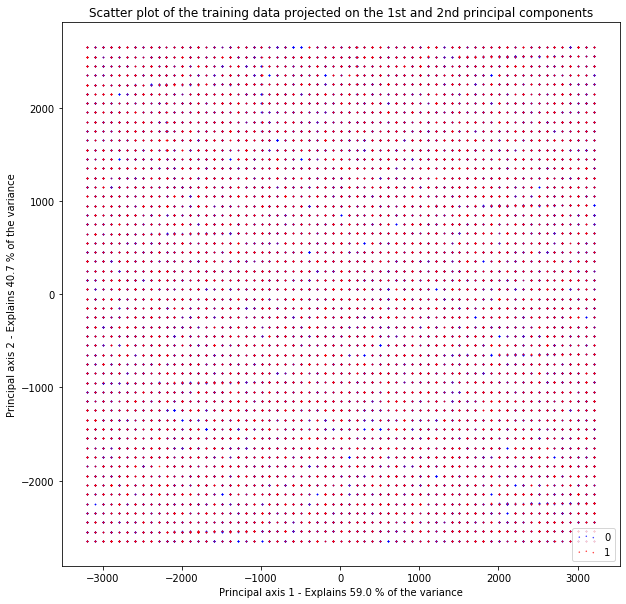

In [54]:
colors = ['blue','red']
plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-01.png', dpi=150)
plt.show()

In [58]:
X = preprocessing.scale(new_x)

In [59]:
test = preprocessing.scale(new_test)


Running PCA again ...
Explained variance: 0.9677
Individual variance contributions:
0.22105307796139245
0.1510509650711264
0.093439072624065
0.09187602240375078
0.09134762522199155
0.09067032741983345
0.09051683347835274
0.08970678484481566
0.04805345262700417


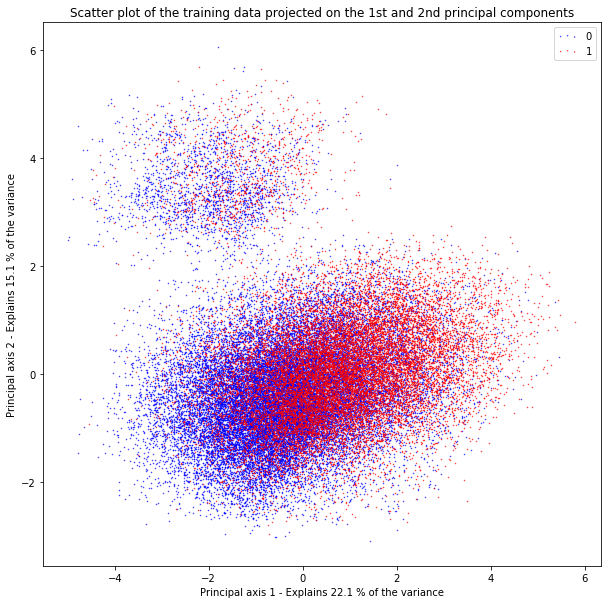

In [75]:
print('\nRunning PCA again ...')

n_comp = 9
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

print('Individual variance contributions:')
for j in range(n_comp):
    print(pca.explained_variance_ratio_[j])

plt.figure(1, figsize=(10, 10))

for color, i, target_name in zip(colors, [0, 1], [0,1]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the training data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca-porto-02.png', dpi=150)
plt.show()


In [79]:
from sklearn.model_selection import train_test_split
x_t, x_c, y_t, y_c = train_test_split(X_pca, y.to_numpy(), test_size=0.3, random_state=42)

Accuracy is:  0.682074074074074


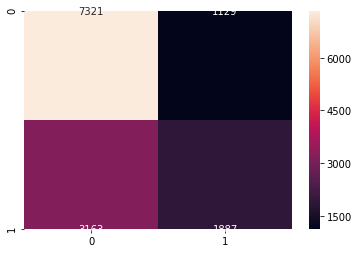

In [93]:
#random forest classifier with n_estimators=10 (default)

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

clf_rf = KNeighborsClassifier(n_neighbors = 201)      
clr_rf = clf_rf.fit(x_t,y_t)

ac = accuracy_score(y_c,clf_rf.predict(x_c))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_c,clf_rf.predict(x_c))
sns.heatmap(cm,annot=True,fmt="d")

In [161]:
import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(6,activation = tf.nn.tanh)
                             ,tf.keras.layers.Dense(6,activation = tf.nn.tanh),
                             tf.keras.layers.Dense(2,activation = tf.nn.tanh),
         tf.keras.layers.Dense(2,activation = tf.nn.softmax)])

In [162]:
opt = tf.keras.optimizers.Adamax(lr=0.02, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [163]:
model.fit(x_t,y_t,epochs=800)

Epoch 1/800
31500/31500 [==============================] - 1s 36us/sample - loss: 0.6015 - acc: 0.6786
Epoch 2/800
31500/31500 [==============================] - 1s 32us/sample - loss: 0.5948 - acc: 0.6860
Epoch 3/800
31500/31500 [==============================] - 1s 30us/sample - loss: 0.5936 - acc: 0.6844
Epoch 4/800
31500/31500 [==============================] - 1s 28us/sample - loss: 0.5919 - acc: 0.6864
Epoch 5/800
31500/31500 [==============================] - 1s 28us/sample - loss: 0.5918 - acc: 0.6868
Epoch 6/800
31500/31500 [==============================] - 1s 28us/sample - loss: 0.5917 - acc: 0.6857
Epoch 7/800
31500/31500 [==============================] - 1s 28us/sample - loss: 0.5912 - acc: 0.6883
Epoch 8/800
31500/31500 [==============================] - 1s 28us/sample - loss: 0.5907 - acc: 0.6864
Epoch 9/800
31500/31500 [==============================] - 1s 28us/sample - loss: 0.5903 - acc: 0.6873
Epoch 10/800
31500/31500 [==============================] - 1s 28us/sampl

31500/31500 [==============================] - 1s 31us/sample - loss: 0.5870 - acc: 0.6886
Epoch 80/800
31500/31500 [==============================] - 1s 30us/sample - loss: 0.5869 - acc: 0.6887
Epoch 81/800
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5867 - acc: 0.6895
Epoch 82/800
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5867 - acc: 0.6890
Epoch 83/800
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5869 - acc: 0.6902
Epoch 84/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5868 - acc: 0.6901
Epoch 85/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5863 - acc: 0.6890
Epoch 86/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5870 - acc: 0.6882
Epoch 87/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5867 - acc: 0.6895
Epoch 88/800
31500/31500 [==============================] - 1s 33us/sample - 

31500/31500 [==============================] - 1s 33us/sample - loss: 0.5868 - acc: 0.6881
Epoch 158/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5867 - acc: 0.6895
Epoch 159/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5864 - acc: 0.6904
Epoch 160/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5862 - acc: 0.6900
Epoch 161/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5866 - acc: 0.6893
Epoch 162/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5866 - acc: 0.6873
Epoch 163/800
31500/31500 [==============================] - 1s 32us/sample - loss: 0.5865 - acc: 0.6894
Epoch 164/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5871 - acc: 0.6884
Epoch 165/800
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5865 - acc: 0.6884
Epoch 166/800
31500/31500 [==============================] - 1s 33us/

31500/31500 [==============================] - 1s 32us/sample - loss: 0.5863 - acc: 0.6898
Epoch 235/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5868 - acc: 0.6873
Epoch 236/800
31500/31500 [==============================] - 1s 32us/sample - loss: 0.5859 - acc: 0.6890
Epoch 237/800
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5867 - acc: 0.6876
Epoch 238/800
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5865 - acc: 0.6893
Epoch 239/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5861 - acc: 0.6913
Epoch 240/800
31500/31500 [==============================] - 1s 34us/sample - loss: 0.5865 - acc: 0.6890
Epoch 241/800
31500/31500 [==============================] - 1s 34us/sample - loss: 0.5866 - acc: 0.68930s - loss: 0.5849 - acc: 
Epoch 242/800
31500/31500 [==============================] - 1s 34us/sample - loss: 0.5860 - acc: 0.6903
Epoch 243/800
31500/31500 [=================

31500/31500 [==============================] - 1s 32us/sample - loss: 0.5864 - acc: 0.6896
Epoch 312/800
31500/31500 [==============================] - 1s 32us/sample - loss: 0.5865 - acc: 0.6885
Epoch 313/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5862 - acc: 0.6893
Epoch 314/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5864 - acc: 0.6890
Epoch 315/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5866 - acc: 0.6890
Epoch 316/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5861 - acc: 0.6889
Epoch 317/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5866 - acc: 0.6898
Epoch 318/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5864 - acc: 0.6891
Epoch 319/800
31500/31500 [==============================] - 1s 33us/sample - loss: 0.5861 - acc: 0.6894
Epoch 320/800
31500/31500 [==============================] - 1s 33us/

31500/31500 [==============================] - 1s 38us/sample - loss: 0.5861 - acc: 0.6888
Epoch 389/800
31500/31500 [==============================] - 1s 39us/sample - loss: 0.5859 - acc: 0.6917
Epoch 390/800
31500/31500 [==============================] - 1s 38us/sample - loss: 0.5861 - acc: 0.6890
Epoch 391/800
31500/31500 [==============================] - 1s 35us/sample - loss: 0.5863 - acc: 0.6904
Epoch 392/800
31500/31500 [==============================] - 1s 36us/sample - loss: 0.5859 - acc: 0.6901
Epoch 393/800
31500/31500 [==============================] - 1s 34us/sample - loss: 0.5865 - acc: 0.6895
Epoch 394/800
31500/31500 [==============================] - 1s 34us/sample - loss: 0.5859 - acc: 0.6903
Epoch 395/800
31500/31500 [==============================] - 1s 36us/sample - loss: 0.5862 - acc: 0.6898
Epoch 396/800
31500/31500 [==============================] - 1s 36us/sample - loss: 0.5859 - acc: 0.6888
Epoch 397/800
31500/31500 [==============================] - 1s 35us/

KeyboardInterrupt: 

In [160]:
model.fit(x_t,y_t,epochs=400)
#val_loss, val_acc = model.evaluate(x_c,y_c)
#print(val_loss)
#print(val_acc)

Epoch 1/400
31500/31500 [==============================] - 1s 37us/sample - loss: 0.5834 - acc: 0.6920
Epoch 2/400
31500/31500 [==============================] - 1s 36us/sample - loss: 0.5834 - acc: 0.6911
Epoch 3/400
31500/31500 [==============================] - 1s 36us/sample - loss: 0.5835 - acc: 0.6929
Epoch 4/400
31500/31500 [==============================] - 1s 31us/sample - loss: 0.5835 - acc: 0.6913
Epoch 5/400
31500/31500 [==============================] - 1s 30us/sample - loss: 0.5834 - acc: 0.6922
Epoch 6/400
25920/31500 [=======================>......] - ETA: 0s - loss: 0.5830 - acc: 0.6903

KeyboardInterrupt: 